In [105]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# Realizando a leitura do dataset em CSV e visualizando o Dataset
df = pd.read_csv('data/sales_data_sample.csv')

# Visualiza as colunas e os 5 primeiros itens
df.head(5)

# Visualiza os tipos de dados
df.dtypes

# Visualiza as colunas os 3 últimos itens
df.tail(3)

# Ordena o dataset pela coluna ORDERNUMBER
df.sort_values(by='ORDERNUMBER')

# Realiza análise da média de vendas acima de U$6.000,00 agrupada pelos países e ordenado pela média crescente de vendas 
analise1 = df[(df["SALES"] > 6000)].groupby(["COUNTRY"]).mean().sort_values(by = "SALES").head(10)
analise1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
COUNTRY,,,,,,,,,
Belgium,10317.666667,44.000000,100.0,1.333333,6408.316667,1.000000,1.333333,2004.666667,141.000000
Switzerland,10266.333333,41.333333,100.0,6.666667,6556.260000,2.333333,6.000000,2004.000000,152.000000
Philippines,10212.000000,45.666667,100.0,4.000000,6571.776667,3.000000,8.333333,2003.333333,140.666667
Sweden,10289.500000,37.666667,100.0,5.333333,6892.280000,2.666667,7.666667,2004.000000,156.500000
Germany,10281.625000,43.500000,100.0,5.000000,7016.471250,2.875000,7.500000,2004.000000,153.500000
Denmark,10256.214286,46.928571,100.0,6.642857,7208.949286,2.642857,6.142857,2003.857143,149.857143
Finland,10251.800000,43.400000,100.0,4.100000,7284.726000,2.400000,6.200000,2003.900000,157.000000
Canada,10310.000000,42.333333,100.0,6.333333,7324.963333,3.333333,9.000000,2004.000000,165.666667
UK,10269.333333,46.111111,100.0,6.000000,7400.127778,2.777778,7.222222,2003.777778,158.888889


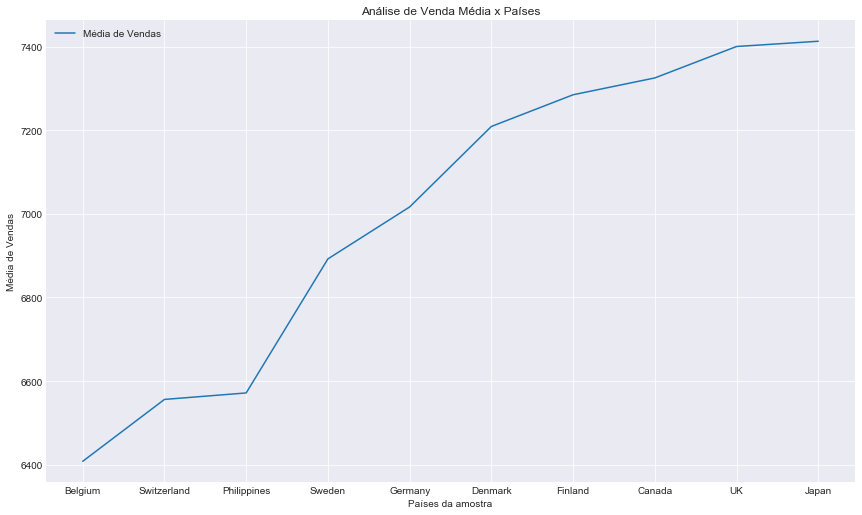

In [107]:
# Primeiro gráfico: análise da média de vendas acima de U$6.000,00 agrupada por países 
plt.plot(analise1["SALES"], label='Média de Vendas')

plt.ylabel('Média de Vendas')
plt.xlabel('Países da amostra')

plt.title("Análise de Venda Média x Países")
plt.legend()

# Altera o tamanho do gráfico
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)
fig.savefig('test2png.png', dpi=100)

plt.show()

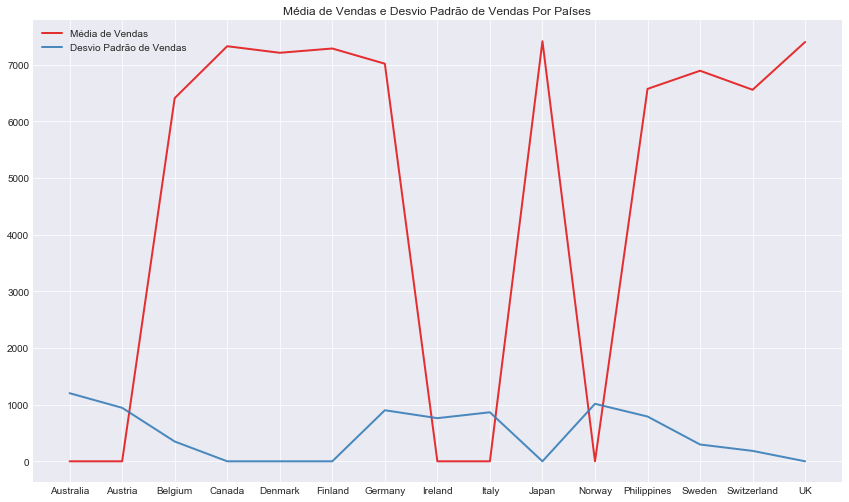

In [112]:
# Cria analise2 conforme o desvio padrão das vendas acima de 6000 dólares
analise2 = df[(df["SALES"] > 6000)].groupby(["COUNTRY"]).std().sort_values(by = "SALES").head(10)

# Gera novo Dataframe mesclando colunas das médias e dos devios padrões das vendas
df2 = pd.DataFrame({
    "Avg. Sales": analise1["SALES"], 
    "Std. Dev. Sales": analise2["SALES"]
})
df2 = df2.fillna(0)

# Define estilo do gráfico
plt.style.use('seaborn-darkgrid')
 
# Cria paleta de cor
palette = plt.get_cmap('Set1')

# Cria a plotagem com duas linhas, a primeira sendo a média e a segunda sendo o desvio padrão
plt.plot(df2["Avg. Sales"], marker='', color=palette(0), linewidth=2, alpha=0.9, label="Média de Vendas")
plt.plot(df2["Std. Dev. Sales"], marker='', color=palette(1), linewidth=2, alpha=0.9, label="Desvio Padrão de Vendas")

# Define o tamanho do gráfico
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)

# Define o título do gráfico
plt.title("Média de Vendas e Desvio Padrão de Vendas Por Países")
plt.legend()